In [28]:
import pandas as pd
import numpy as np
  
# Librerias de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('../Data/tested.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
32,924,1,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0,1,2,C.A. 2315,20.5750,NaN,S
239,1131,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C86,C
334,1226,0,3,"Cor, Mr. Ivan",male,27.0,0,0,349229,7.8958,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
161,1053,0,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,C


In [30]:
df.isna().sum()[df.isna().sum() > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [31]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df.head()

C:\Users\Abi\AppData\Local\Temp\ipykernel_8780\1821379793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Abi\AppData\Local\Temp\ipykernel_8780\1821379793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
categorias_unicas = df['Cabin'].unique()
df['Cabin'].fillna(np.random.choice(categorias_unicas), inplace=True)

C:\Users\Abi\AppData\Local\Temp\ipykernel_8780\2840380793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(np.random.choice(categorias_unicas), inplace=True)


In [33]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

# Feature engineer

In [34]:
df.drop('Embarked', axis=1,inplace=True)
df['Sex'] = df['Sex'].replace({'male': 1, 'female':2})
df

C:\Users\Abi\AppData\Local\Temp\ipykernel_8780\3316733689.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 1, 'female':2})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,B57 B59 B63 B66
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.00000,1,0,363272,7.0000,B57 B59 B63 B66
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,B57 B59 B63 B66
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,B57 B59 B63 B66
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",2,39.00000,0,0,PC 17758,108.9000,C105
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,B57 B59 B63 B66


<Axes: >

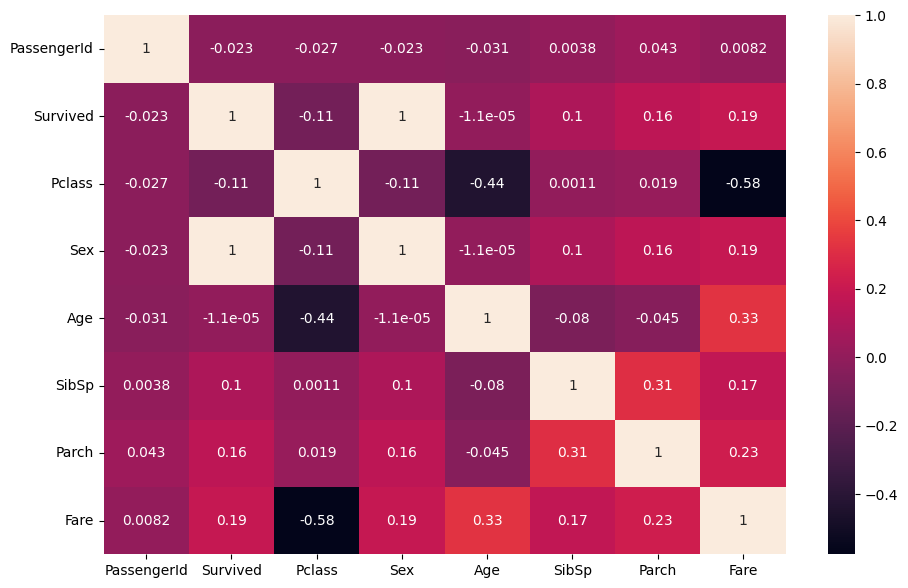

In [55]:
plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(numeric_only= True), annot = True)

### Pairplot

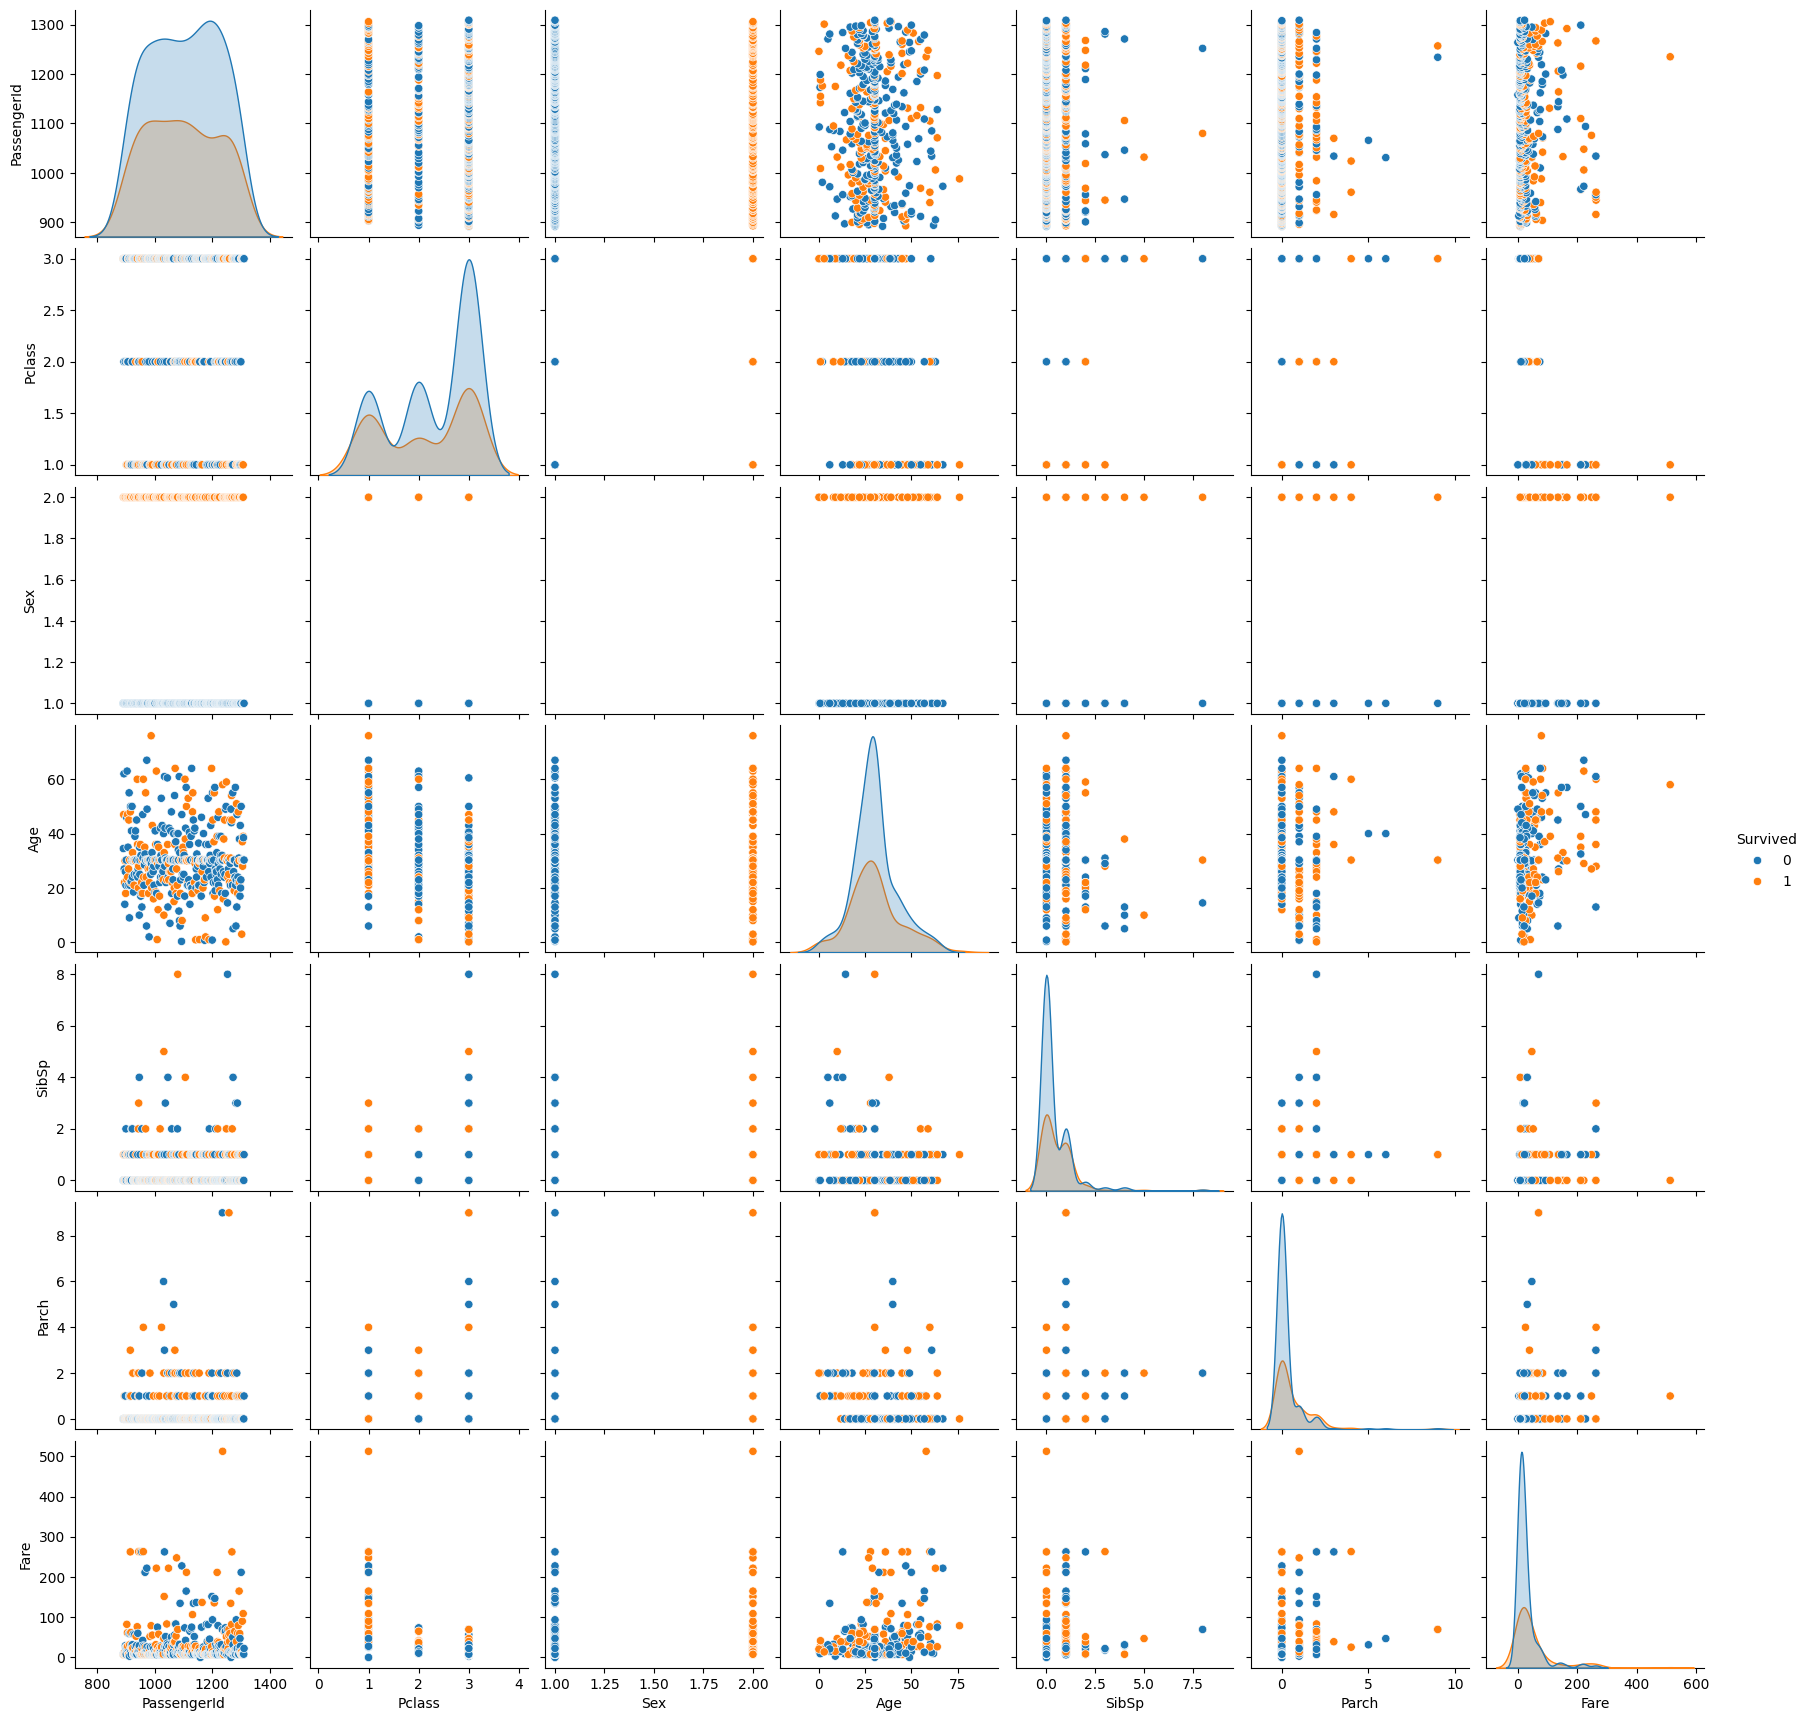

In [53]:
sns.pairplot(df, hue='Survived')
plt.show()

In [42]:
df[numeric_cols].corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.191382
Pclass,-0.108615,1.000000,-0.108615,-0.440782,0.001087,0.018721,-0.576619
Sex,1.000000,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.191382
Age,-0.000011,-0.440782,-0.000011,1.000000,-0.079535,-0.045073,0.326800
SibSp,0.099943,0.001087,0.099943,-0.079535,1.000000,0.306895,0.171488
Parch,0.159120,0.018721,0.159120,-0.045073,0.306895,1.000000,0.230001
Fare,0.191382,-0.576619,0.191382,0.326800,0.171488,0.230001,1.000000
